# Teoretiska frågor

In [ ]:
Teoretiska Frågor

1. Beskriv kort hur en relationsdatabas fungerar.
En relationsdatabas organiserar data i tabeller som består av rader och kolumner. 
Varje tabell innehåller information om ett visst ämne eller typ av objekt, till exempel kunder, produkter eller beställningar. 
Tabellerna kopplas ihop genom relationer – ofta via primärnycklar (unik identifierare i en tabell) och främmande nycklar 
(referens till primärnyckel i en annan tabell).

För att hantera data används SQL (Structured Query Language), som är det vanligaste språket för att skapa, läsa, uppdatera och ta bort data. 
Ett RDBMS (Relational Database Management System) är den programvara som används för att hantera själva databasen.

2. Vad menas med “CRUD”-flödet?
CRUD står för Create, Read, Update och Delete vilket innefattar de grundläggande operationer som kan utföras på data i en
relationsdatabas.
Create: Skapa tabeller och lägga till nya rader, tex en ny kund
Read: Hämta data, tex kundtjänst vill ha info om en kund
Update: Uppdatera data
Delete: Radera data, tex en kund som inte vill finnas kvar i register

3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?
JOIN används i SQL för att kombinera rader från två eller flera tabeller baserat på ett gemensamt fält, vanligtvis en primärnyckel 
och en främmande nyckel. Det gör att man kan hämta relaterad information som finns utspridd i flera tabeller.

INNER JOIN returnerar bara de rader där det finns en matchning i båda tabeller.
LEFT JOIN (eller LEFT OUTER JOIN) returnerar alla rader från vänstra tabellen, samt matchande rader från den högra. 
Om det inte finns någon match, returneras NULL på höger sida.

Joins används för att effektivt kunna analysera och rapportera på data som finns i flera relaterade tabeller.

4. Beskriv kort vad indexering i SQL innebär.
Indexering i SQL innebär att man skapar en särskild datastruktur som gör att databasen kan hitta data snabbare, 
utan att behöva söka igenom hela tabellen. Det fungerar som ett register i en bok, i stället för att bläddra sida för sida kan man 
snabbt hoppa till rätt plats.

Index används ofta på kolumner som används i WHERE-villkor eller som nycklar vid joins. Fördelen är att sökningar och filtrering 
går mycket snabbare. 
Nackdelen är att index kräver extra lagringsutrymme och måste uppdateras när data förändras, 
vilket kan påverka prestandan vid t.ex. insättning eller uppdatering av data, varför man alltid bör överväga indexering. 

5. Beskriv kort vad en vy i SQL är.
En vy (view) är en virtuell tabell som skapas utifrån ett SELECT-uttryck. 
Den lagrar ingen data själv utan visar data från en eller flera underliggande tabeller. 
Vyer används ofta för att förenkla åtkomsten till komplex data, till exempel genom att sammanfatta eller filtrera information.

Man kan använda en vy precis som en vanlig tabell i SQL-frågor. Vyer används också för att kontrollera åtkomst, 
till exempel kan en användare ges tillgång till en vy med aggregerade siffror, utan att få se känsliga uppgifter i originaltabellerna.

6. Beskriv kort vad en lagrad procedur i SQL är.
En lagrad procedur (stored procedure) är ett fördefinierat SQL-program som lagras i databasen och kan köras vid behov. 
Den innehåller ett eller flera SQL-kommandon som till exempel kan uppdatera tabeller, 
köra beräkningar eller utföra kontrollflöden med villkor och loopar.

Lagrade procedurer används för att automatisera återkommande uppgifter och säkerställa att affärslogik körs på ett konsekvent sätt. 
De kan ta emot inparametrar, innehålla villkorlig logik och ibland returnera resultat. 
Eftersom koden körs direkt i databasen kan procedurer även bidra till förbättrad prestanda och säkerhet.

# Laddar bibliotek och ansluter till databasen

In [1]:
from sqlalchemy import create_engine, text, Table, Column, Integer, String, Numeric, MetaData, DateTime, func, URL, inspect, Index
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
from urllib.parse import quote_plus
from datetime import datetime, timedelta

In [2]:
# Databasanslutning
SERVER = 'localhost'
DATABASE = 'AdventureWorks2022'
DRIVER = 'ODBC Driver 17 for SQL Server'

connection_url = URL.create(
    "mssql+pyodbc",
    host=SERVER,
    database=DATABASE,
    query={
        "driver": DRIVER,
        "Trusted_Connection": "yes"
    }
)

engine = create_engine(connection_url)
connection = engine.connect()
inspector = inspect(engine)

In [4]:
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


# Diskriptiv sammanfattning över databasen

### Dataöversikt

In [ ]:
# Hämta alla schemas i databasen
alla_schemas = inspector.get_schema_names()
egna_schemas = []

# Filtrerar bort system-/standardschemas (t.ex. dbo) genom att bara behålla schemas som innehåller minst en tabell
for s in alla_schemas:
        try:
            tabeller = inspector.get_table_names(schema=s)
            if tabeller:
                egna_schemas.append(s)
        except:
            pass

# Räkna tabeller och vyer
antal_vyer = sum(len(inspector.get_view_names(schema=s)) for s in egna_schemas)
antal_tabeller = sum(len(inspector.get_table_names(schema=s)) for s in egna_schemas)

# Räkna kolumner
antal_kolumner = 0
for schema in egna_schemas:
    for table in inspector.get_table_names(schema=schema):
        try:
            kolumner = inspector.get_columns(table, schema=schema)
            antal_kolumner += len(kolumner)
        except:
            pass

# Skapar en dataframe med en översikt av databasens struktur
struktur_data = {
    "Antal schemas": [len(egna_schemas)],
    "Antal tabeller": [antal_tabeller],
    "Antal vyer": [antal_vyer],
    "Totalt antal kolumner": [antal_kolumner]
}

df_struktur = pd.DataFrame(struktur_data)
df_struktur


C:\Users\CD\AppData\Local\Temp\ipykernel_10200\2427410238.py:23: SAWarning: Did not recognize type 'hierarchyid' of column 'OrganizationNode'
  kolumner = inspector.get_columns(table, schema=schema)
C:\Users\CD\AppData\Local\Temp\ipykernel_10200\2427410238.py:23: SAWarning: Did not recognize type 'geography' of column 'SpatialLocation'
  kolumner = inspector.get_columns(table, schema=schema)
C:\Users\CD\AppData\Local\Temp\ipykernel_10200\2427410238.py:23: SAWarning: Did not recognize type 'hierarchyid' of column 'DocumentNode'
  kolumner = inspector.get_columns(table, schema=schema)


,Antal schemas,Antal tabeller,Antal vyer,Totalt antal kolumner
0,7,74,22,509


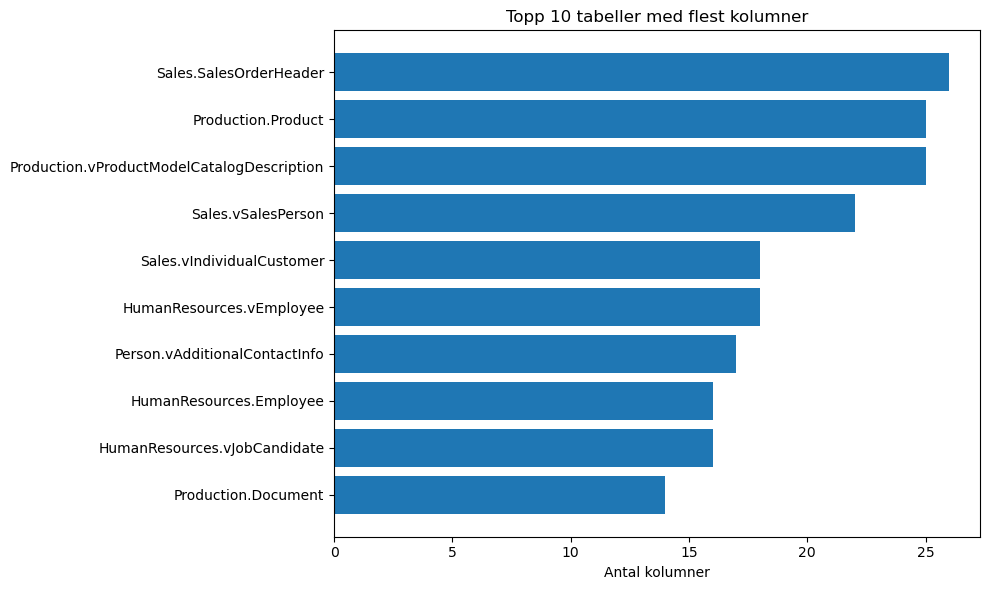

In [ ]:
# Läs in kolumndata från databasen
df = pd.read_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS", engine)

# Gruppindela på schema och tabell
df_kolumner_per_tabell = df.groupby(["TABLE_SCHEMA", "TABLE_NAME"]).size().reset_index(name="Antal kolumner")

# Döp om kolumner till tydligare namn
df_kolumner_per_tabell.columns = ["Schema", "Tabell", "Antal kolumner"]

# Välj topp 10
top10_kolumner = df_kolumner_per_tabell.sort_values(by="Antal kolumner", ascending=False).head(10).copy()

# Skapa kolumn med kombinerat namn
top10_kolumner["Tabell_namn"] = top10_kolumner["Schema"] + "." + top10_kolumner["Tabell"]

# Plotta
plt.figure(figsize=(10, 6))
plt.barh(top10_kolumner["Tabell_namn"], top10_kolumner["Antal kolumner"])
plt.xlabel("Antal kolumner")
plt.title("Topp 10 tabeller med flest kolumner")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Kort övergripande beskrivning av databasen AdventureWorks2022

Databasen AdventureWorks innefattar information inom följande områden:

- Produkter (Production): Innehåller uppgifter om produkter, t.ex. produkt-ID, modeller, produktkategorier och lagerstatus.
- Försäljning (Sales): Innehåller försäljningsdata såsom orderinformation, orderdatum och försäljningsregioner.
- Personer (Person): Innehåller kontaktinformation för anställda och andra personer i systemet.
- Personal (HumanResources): Innehåller information om anställningar, inklusive titel, lön och anställningsdatum.
- Inköp (Purchasing): Innehåller uppgifter om leverantörer, inköpsorder och inköpskostnader per artikel.


In [15]:
# Antal produkter
query_produkter = "SELECT COUNT(*) AS antal_produkter FROM Production.Product"
df_produkter = pd.read_sql(query_produkter, engine)

# Antal nuvarande anställda
query_anstallda = """
SELECT COUNT(DISTINCT e.BusinessEntityID) AS antal_anstallda
FROM HumanResources.Employee e
JOIN HumanResources.EmployeeDepartmentHistory h
  ON e.BusinessEntityID = h.BusinessEntityID
WHERE h.EndDate IS NULL
"""
df_anstallda = pd.read_sql(query_anstallda, engine)

# Antal leverantörer
query_leverantorer = "SELECT COUNT(*) AS antal_leverantorer FROM Purchasing.Vendor"
df_leverantorer = pd.read_sql(query_leverantorer, engine)

# Antal unika kunder
query_kunder = "SELECT COUNT(DISTINCT CustomerID) AS antal_unika_kunder FROM Sales.SalesOrderHeader"
df_kunder = pd.read_sql(query_kunder, engine)

# Antal butiker
query_butiker = "SELECT COUNT(*) AS antal_butiker FROM Sales.Store"
df_butiker = pd.read_sql(query_butiker, engine)

# Sammanfattningen
print("Antal produkter:", df_produkter.iloc[0, 0])
print("Antal nuvarande anställda:", df_anstallda.iloc[0, 0])
print("Antal leverantörer:", df_leverantorer.iloc[0, 0])
print("Antal unika kunder:", df_kunder.iloc[0, 0])
print("Antal butiker:", df_butiker.iloc[0, 0])

Antal produkter: 504
Antal nuvarande anställda: 290
Antal leverantörer: 104
Antal unika kunder: 19119
Antal butiker: 701


In [17]:
# Undersöker vilken tidsperiod databasen täcker

query = """
SELECT 
    MIN(OrderDate) AS FörstaDatum,
    MAX(OrderDate) AS SistaDatum
FROM Sales.SalesOrderHeader
"""

df_datum = pd.read_sql(query, engine)
df_datum

,FörstaDatum,SistaDatum
0,2011-05-31,2014-06-30


# Statistisk analys av databasen AdventureWorks2022

Nedan statistika analys avser att ge en övergipande bild av försäljningen på AdventureWorks. 
- Hur har försäljningen utvecklats över tid inkl. rullande 12-månaderssummering för att jämna ut säsongsvariationer och tydliggöra trender
- Vilka produkter säljer mest
- Vilka produkter ger högst lönsamhet
- Snittorder
- Försäljning per säljare

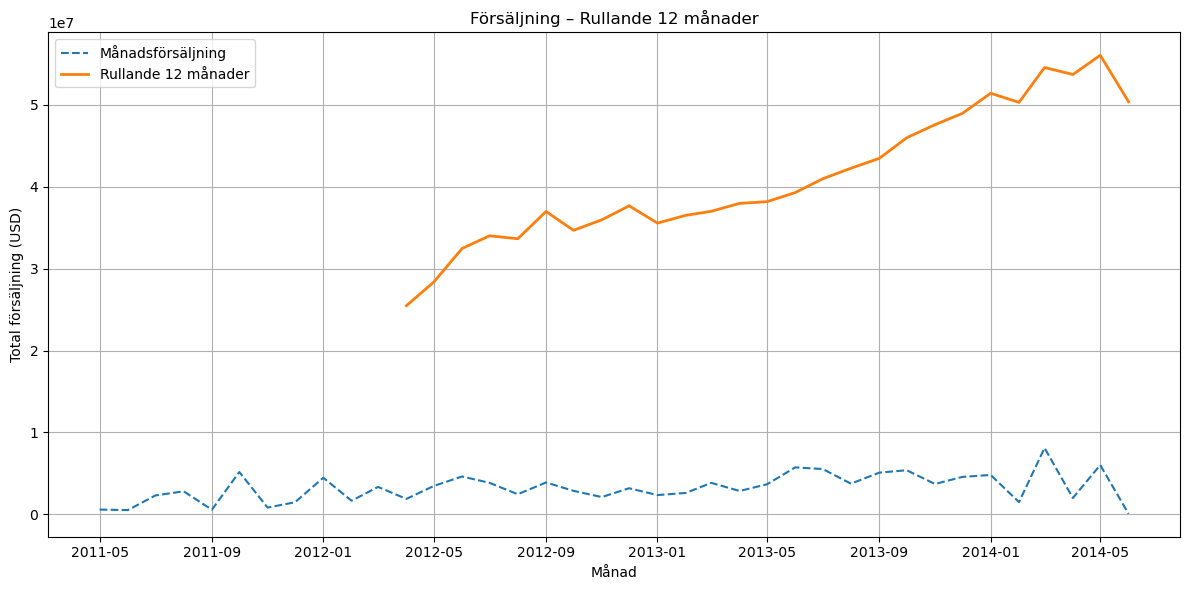

In [34]:
# Försäljningsutveckling
query_rullande12 = """
SELECT
    CAST(DATEFROMPARTS(YEAR(OrderDate), MONTH(OrderDate), 1) AS DATE) AS Månad,
    SUM(TotalDue) AS TotalFörsäljning
FROM Sales.SalesOrderHeader
GROUP BY
    CAST(DATEFROMPARTS(YEAR(OrderDate), MONTH(OrderDate), 1) AS DATE)
ORDER BY Månad
"""
df_forsaljning = pd.read_sql(query_rullande12, engine)

# Säkerställ datumformat
df_forsaljning["Månad"] = pd.to_datetime(df_forsaljning["Månad"])

# Sortera
df_forsaljning = df_forsaljning.sort_values("Månad")

# Lägg till kolumn för rullande 12 månaders försäljning
df_forsaljning["Rullande12"] = df_forsaljning["TotalFörsäljning"].rolling(window=12).sum()

plt.figure(figsize=(12, 6))
plt.plot(df_forsaljning["Månad"], df_forsaljning["TotalFörsäljning"], label="Månadsförsäljning", linestyle="--")
plt.plot(df_forsaljning["Månad"], df_forsaljning["Rullande12"], label="Rullande 12 månader", linewidth=2)

plt.title("Försäljning – Rullande 12 månader")
plt.xlabel("Månad")
plt.ylabel("Total försäljning (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Försäljning senaste 12 månderna jämfört med fg 12 månader

query = """
SELECT 
    CASE 
        WHEN soh.OrderDate >= '2012-06-30' AND soh.OrderDate < '2013-06-30' THEN 'Period_2013_06'
        WHEN soh.OrderDate >= '2013-06-30' AND soh.OrderDate <= '2014-06-30' THEN 'Period_2014_06'
    END AS Period,
    SUM(sod.LineTotal) AS TotalSales
FROM Sales.SalesOrderHeader AS soh
JOIN Sales.SalesOrderDetail AS sod
    ON soh.SalesOrderID = sod.SalesOrderID
WHERE soh.OrderDate BETWEEN '2012-06-30' AND '2014-06-30'
GROUP BY 
    CASE 
        WHEN soh.OrderDate >= '2012-06-30' AND soh.OrderDate < '2013-06-30' THEN 'Period_2013_06'
        WHEN soh.OrderDate >= '2013-06-30' AND soh.OrderDate <= '2014-06-30' THEN 'Period_2014_06'
    END
"""

df_sales_compare = pd.read_sql(query, engine)

# Sätt index och sortera rätt
df_sales_compare = df_sales_compare.set_index('Period').sort_index()

# Räkna skillnad i kronor och procent
sales_before = df_sales_compare.loc['Period_2013_06', 'TotalSales']
sales_after = df_sales_compare.loc['Period_2014_06', 'TotalSales']

difference_kr = sales_after - sales_before
difference_pct = 100 * difference_kr / sales_before

print(f" Försäljning föregående 12 mån: {sales_before:,.0f} kr")
print(f" Försäljning senaste 12 mån:     {sales_after:,.0f} kr")
print(f" Ökning: {difference_kr:,.0f} kr ({difference_pct:.1f} %)")


 Försäljning föregående 12 mån: 34,343,842 kr
 Försäljning senaste 12 mån:     49,247,958 kr
 Ökning: 14,904,116 kr (43.4 %)


In [83]:
# Produkter per högst antal sålda enheter senaste 12 månaderna jmf med fg period

def generate_rolling12_sql(slutdatum):

    from datetime import datetime, timedelta

    # Slutdatum som datetime
    end_date = datetime.strptime(slutdatum, "%Y-%m-%d")
    
    # Rullande period 1 (senaste 12 månader)
    start_1 = (end_date - timedelta(days=365)).strftime("%Y-%m-%d")
    end_1 = slutdatum

    # Rullande period 2 (året före)
    start_2 = (end_date - timedelta(days=730)).strftime("%Y-%m-%d")
    end_2 = (end_date - timedelta(days=366)).strftime("%Y-%m-%d")

    sql = f"""
    SELECT 
      DENSE_RANK() OVER (ORDER BY SUM(SOD.OrderQty) DESC) AS SalesRank,
      P.ProductID,
      P.Name,
      SUM(SOD.OrderQty) AS TotalSold_Period,
      ISNULL(PrevYear.TotalSold_YearBefore, 0) AS TotalSold_YearBefore
    FROM 
      Production.Product AS P
      JOIN Sales.SalesOrderDetail AS SOD ON P.ProductID = SOD.ProductID
      JOIN Sales.SalesOrderHeader AS SOH ON SOD.SalesOrderID = SOH.SalesOrderID
      LEFT JOIN (
        SELECT 
          P2.ProductID,
          SUM(SOD2.OrderQty) AS TotalSold_YearBefore
        FROM 
          Production.Product AS P2
          JOIN Sales.SalesOrderDetail AS SOD2 ON P2.ProductID = SOD2.ProductID
          JOIN Sales.SalesOrderHeader AS SOH2 ON SOD2.SalesOrderID = SOH2.SalesOrderID
        WHERE 
          SOH2.OrderDate BETWEEN '{start_2}' AND '{end_2}'
        GROUP BY 
          P2.ProductID
      ) AS PrevYear ON P.ProductID = PrevYear.ProductID
    WHERE 
      SOH.OrderDate BETWEEN '{start_1}' AND '{end_1}'
    GROUP BY 
      P.ProductID, P.Name, PrevYear.TotalSold_YearBefore
    ORDER BY 
      SUM(SOD.OrderQty) DESC
    """
    
    return sql

# Diagram över flest sålda produkter
def plot_top10_rolling12(df, slutdatum):
    """
    Plottar topp 10 produkter baserat på rolling 12-months DataFrame.
    
    Parametrar:
    - df: DataFrame som kommer från SQL-frågan
    - slutdatum: str, t.ex. '2014-06-30'
    """
    # Omvandla slutdatum till datetime-objekt
    end_date = datetime.strptime(slutdatum, "%Y-%m-%d")
    
    # Tidsperioder som text för etiketter
    period_now = f"{(end_date - timedelta(days=365)).strftime('%Y-%m-%d')} – {end_date.strftime('%Y-%m-%d')}"
    period_prev = f"{(end_date - timedelta(days=730)).strftime('%Y-%m-%d')} – {(end_date - timedelta(days=366)).strftime('%Y-%m-%d')}"

    # Ta de 10 översta
    top10 = df.head(10).copy()

    # Bygg plottvänlig DataFrame
    top10_plot = top10[["Name", "TotalSold_Period", "TotalSold_YearBefore"]].set_index("Name")

    # Plotta
    top10_plot.plot(kind="barh", figsize=(10, 6))

    plt.title(f"Topp 10 produkter\nSenaste 12 mån ({period_now}) jämfört med föregående 12 mån ({period_prev})")
    plt.xlabel("Antal sålda enheter")
    plt.ylabel("Produkt")
    plt.legend([period_now, period_prev], title="Period")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

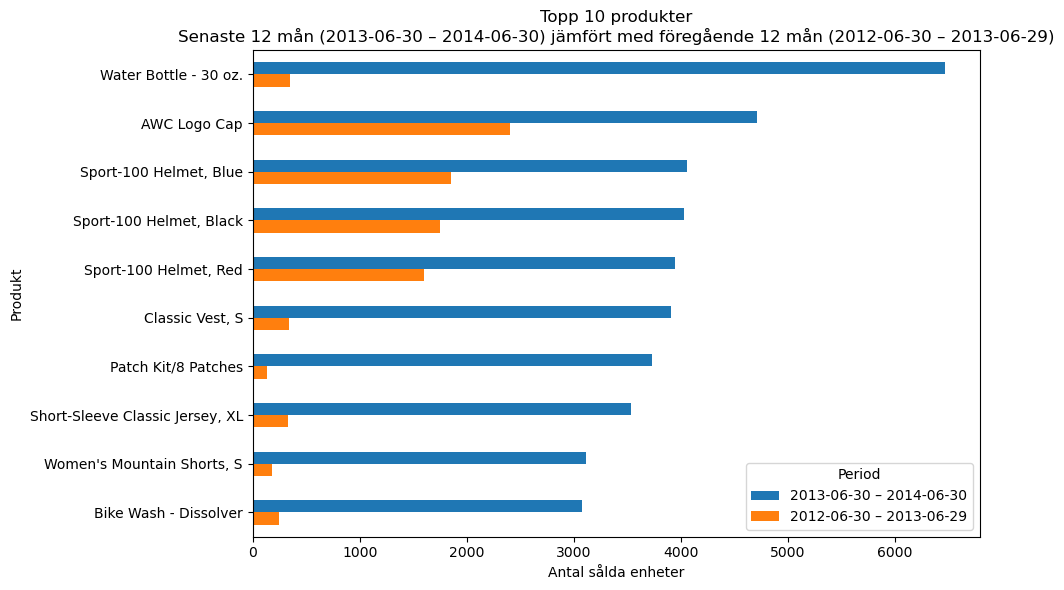

In [ ]:
# Anropar funktionen för att visualisera topp 10 produkter
sql = generate_rolling12_sql("2014-06-30")
df = pd.read_sql(sql, engine, index_col='SalesRank')
plot_top10_rolling12(df, "2014-06-30")

In [89]:
#Skapar tabell i SQL databasen över "Profit Per Product"

#Skapar först ett nytt schema
create_schema_query = text("""
IF NOT EXISTS (SELECT * FROM sys.schemas WHERE name = 'Analytics')
BEGIN
    EXEC('CREATE SCHEMA Analytics')
END
""")

with engine.begin() as conn:
    conn.execute(create_schema_query)

print("Schema 'Analytics' kontrollerat/skapat.")


Schema 'Analytics' kontrollerat/skapat.


In [ ]:
# Skapar tabellstruktur
metadata = MetaData()

profit_per_product = Table(
    'ProfitPerProduct', metadata,
    Column('ProductID', Integer, primary_key=True, autoincrement=False), 
    Column('ProductName', String(50)),
    Column('ProductNumber', String(25)),
    Column('StandardCost', Numeric(19, 4), nullable=False),
    Column('AvgDiscountedPrice', Numeric(19, 4)),
    Column('TotalQuantitySold', Integer, nullable=False),
    Column('TotalRevenue', Numeric(19, 4)),
    Column('TotalProfit', Numeric(19, 4)),
    Column('ProfitMarginPercent', Numeric(6, 2)),
    schema='Analytics'
)

metadata.create_all(engine, tables=[profit_per_product])

print("Tabell skapad.")


In [ ]:
#Laddar tabellen med datan
insert_query = text("""
INSERT INTO Analytics.ProfitPerProduct (
    ProductID, ProductName, ProductNumber, StandardCost,
    AvgDiscountedPrice, TotalQuantitySold, TotalRevenue,
    TotalProfit, ProfitMarginPercent
)
SELECT 
    p.ProductID,
    p.Name AS ProductName,
    p.ProductNumber,
    p.StandardCost,
    AVG(sod.UnitPrice * (1 - sod.UnitPriceDiscount)) AS AvgDiscountedPrice,
    SUM(sod.OrderQty) AS TotalQuantitySold,
    SUM(sod.LineTotal) AS TotalRevenue,
    SUM(sod.LineTotal - (sod.OrderQty * p.StandardCost)) AS TotalProfit,
    CASE 
        WHEN SUM(sod.LineTotal) = 0 THEN NULL
        ELSE (SUM(sod.LineTotal - (sod.OrderQty * p.StandardCost)) * 100.0 / SUM(sod.LineTotal))
    END AS ProfitMarginPercent
FROM Production.Product p
JOIN Sales.SalesOrderDetail sod ON p.ProductID = sod.ProductID
GROUP BY p.ProductID, p.Name, p.ProductNumber, p.StandardCost
""")
# Rensa och ladda om data
with engine.begin() as conn:
    conn.execute(text("DELETE FROM Analytics.ProfitPerProduct"))
    conn.execute(insert_query)
print("Data har laddats in i Analytics.ProfitPerProduct.")

In [33]:
# Lönsamhet per produktgrupp

query = """
SELECT 
    pc.Name AS ProductCategory,
    SUM(ppp.TotalQuantitySold * CAST(sod.OrderQty AS FLOAT) / NULLIF(ppp.TotalQuantitySold, 0)) AS TotalQuantitySold,
    SUM(ppp.TotalRevenue * CAST(sod.OrderQty AS FLOAT) / NULLIF(ppp.TotalQuantitySold, 0)) AS TotalRevenue,
    SUM(ppp.TotalProfit * CAST(sod.OrderQty AS FLOAT) / NULLIF(ppp.TotalQuantitySold, 0)) AS TotalProfit,
    AVG(ppp.ProfitMarginPercent) AS AvgProfitMarginPercent
FROM Sales.SalesOrderDetail AS sod
JOIN Sales.SalesOrderHeader AS soh
    ON sod.SalesOrderID = soh.SalesOrderID
JOIN Analytics.ProfitPerProduct AS ppp
    ON sod.ProductID = ppp.ProductID
JOIN Production.Product AS p
    ON p.ProductID = sod.ProductID
LEFT JOIN Production.ProductSubcategory AS psc
    ON p.ProductSubcategoryID = psc.ProductSubcategoryID
LEFT JOIN Production.ProductCategory AS pc
    ON psc.ProductCategoryID = pc.ProductCategoryID
WHERE soh.OrderDate BETWEEN '2011-05-31' AND '2014-06-30'
GROUP BY pc.Name
ORDER BY TotalProfit DESC
"""
df_profit_by_category = pd.read_sql(query, engine)

df_formatted = df_profit_by_category.copy()

for col in ['TotalQuantitySold', 'TotalRevenue', 'TotalProfit']:
    df_formatted[col] = df_formatted[col].apply(lambda x: f"{int(round(x)):,}")

df_formatted['AvgProfitMarginPercent'] = df_formatted['AvgProfitMarginPercent'].apply(lambda x: f"{int(round(x))} %")

df_formatted


,ProductCategory,TotalQuantitySold,TotalRevenue,TotalProfit,AvgProfitMarginPercent
0,Bikes,"90,268","94,651,173","7,936,394",7 %
1,Accessories,"61,932","1,272,073","636,394",56 %
2,Components,"49,044","11,802,593","490,233",12 %
3,Clothing,"73,670","2,120,543","308,882",12 %


In [ ]:
# Top 3 produkter per ProductCategory med profitandel och rank

query_top3_per_category = """
WITH Produktdata AS (
    SELECT 
        sod.ProductID,
        p.Name AS ProductName,
        pc.Name AS ProductCategory,
        SUM(ppp.TotalProfit * CAST(sod.OrderQty AS FLOAT) / NULLIF(ppp.TotalQuantitySold, 0)) AS TotalProfit
    FROM Sales.SalesOrderDetail AS sod
    JOIN Sales.SalesOrderHeader AS soh ON sod.SalesOrderID = soh.SalesOrderID
    JOIN Production.Product AS p ON sod.ProductID = p.ProductID
    LEFT JOIN Production.ProductSubcategory AS psc ON p.ProductSubcategoryID = psc.ProductSubcategoryID
    LEFT JOIN Production.ProductCategory AS pc ON psc.ProductCategoryID = pc.ProductCategoryID
    JOIN Analytics.ProfitPerProduct AS ppp ON sod.ProductID = ppp.ProductID
    WHERE soh.OrderDate BETWEEN '2011-05-31' AND '2014-06-30'
    GROUP BY sod.ProductID, p.Name, pc.Name
),
RankadeProdukter AS (
    SELECT
        ProductName,
        ProductCategory,
        ROUND(TotalProfit, 2) AS TotalProfit,
        RANK() OVER (PARTITION BY ProductCategory ORDER BY TotalProfit DESC) AS RankInCategory,
        ROUND(100 * TotalProfit / SUM(TotalProfit) OVER (PARTITION BY ProductCategory), 1) AS PercentOfCategoryProfit
    FROM Produktdata
)
SELECT *
FROM RankadeProdukter
WHERE RankInCategory <= 3
ORDER BY ProductCategory, RankInCategory
"""

df_top3 = pd.read_sql(query_top3_per_category, engine)
df_top3.head(10)

,ProductName,ProductCategory,TotalProfit,RankInCategory,PercentOfCategoryProfit
0,Hitch Rack - 4-Bike,Accessories,95006.08,1,14.9
1,"Sport-100 Helmet, Blue",Accessories,77165.70,2,12.1
2,"Sport-100 Helmet, Red",Accessories,75773.64,3,11.9
3,"Mountain-200 Black, 42",Bikes,674216.58,1,8.5
4,"Mountain-200 Black, 38",Bikes,673444.47,2,8.5
5,"Mountain-200 Black, 46",Bikes,666740.69,3,8.4
6,"Classic Vest, S",Clothing,55536.06,1,18.0
7,"Women's Mountain Shorts, L",Clothing,51858.10,2,16.8
8,"Women's Mountain Shorts, S",Clothing,50887.04,3,16.5
9,HL Mountain Rear Wheel,Components,42522.31,1,8.7


In [35]:
# Lönsamhet per produkt 

query = """
WITH Produktdata AS (
    SELECT 
        sod.ProductID,
        p.Name AS ProductName,
        p.ProductNumber,
        pc.Name AS ProductCategory,
        SUM(sod.OrderQty) AS TotalQuantitySold,
        SUM(sod.LineTotal) AS TotalRevenue,
        SUM(ppp.TotalProfit * CAST(sod.OrderQty AS FLOAT) / NULLIF(ppp.TotalQuantitySold, 0)) AS TotalProfit
    FROM Sales.SalesOrderDetail AS sod
    JOIN Sales.SalesOrderHeader AS soh
        ON sod.SalesOrderID = soh.SalesOrderID
    JOIN Production.Product AS p
        ON sod.ProductID = p.ProductID
    LEFT JOIN Production.ProductSubcategory AS psc
        ON p.ProductSubcategoryID = psc.ProductSubcategoryID
    LEFT JOIN Production.ProductCategory AS pc
        ON psc.ProductCategoryID = pc.ProductCategoryID
    JOIN Analytics.ProfitPerProduct AS ppp
        ON sod.ProductID = ppp.ProductID
    WHERE soh.OrderDate BETWEEN '2011-05-31' AND '2014-06-30'
    GROUP BY sod.ProductID, p.Name, p.ProductNumber, pc.Name
)

SELECT TOP 10 
    ProductID,
    ProductName,
    ProductNumber,
    ProductCategory,
    TotalQuantitySold,
    TotalRevenue,
    TotalProfit,
    100.0 * TotalProfit / NULLIF(TotalRevenue, 0) AS ProfitMarginPercent
FROM Produktdata
ORDER BY ProfitMarginPercent DESC
"""
df_top10_margin = pd.read_sql(query, engine)

for col in ['TotalQuantitySold', 'TotalRevenue', 'TotalProfit']:
    df_top10_margin[col] = df_top10_margin[col].apply(lambda x: f"{int(round(x)):,}")

df_top10_margin['ProfitMarginPercent'] = df_top10_margin['ProfitMarginPercent'].apply(lambda x: f"{x:.1f} %")

df_top10_margin


,ProductID,ProductName,ProductNumber,ProductCategory,TotalQuantitySold,TotalRevenue,TotalProfit,ProfitMarginPercent
0,878,Fender Set - Mountain,FE-6654,Accessories,"2,121","46,620","29,184",62.6 %
1,933,HL Road Tire,TI-R982,Accessories,858,"27,971","17,510",62.6 %
2,879,All-Purpose Bike Stand,ST-1401,Accessories,249,"39,591","24,784",62.6 %
3,930,HL Mountain Tire,TI-M823,Accessories,"1,396","48,860","30,586",62.6 %
4,929,ML Mountain Tire,TI-M602,Accessories,"1,161","34,818","21,796",62.6 %
5,934,Touring Tire,TI-T723,Accessories,935,"27,106","16,968",62.6 %
6,932,ML Road Tire,TI-R628,Accessories,926,"23,141","14,486",62.6 %
7,928,LL Mountain Tire,TI-M267,Accessories,862,"21,541","13,485",62.6 %
8,931,LL Road Tire,TI-R092,Accessories,"1,044","22,436","14,045",62.6 %
9,871,Mountain Bottle Cage,BC-M005,Accessories,"2,025","20,230","12,664",62.6 %


In [79]:
query_top10_profit_per_unit = """
WITH Produktdata AS (
    SELECT 
        sod.ProductID,
        p.Name AS ProductName,
        psc.Name AS ProductSubcategoryName,
        pc.Name AS ProductCategory,
        SUM(sod.OrderQty) AS TotalQuantitySold,
        SUM(sod.LineTotal) AS TotalRevenue,
        SUM(ppp.TotalProfit * CAST(sod.OrderQty AS FLOAT) / NULLIF(ppp.TotalQuantitySold, 0)) AS TotalProfit
    FROM Sales.SalesOrderDetail AS sod
    JOIN Sales.SalesOrderHeader AS soh
        ON sod.SalesOrderID = soh.SalesOrderID
    JOIN Production.Product AS p 
        ON sod.ProductID = p.ProductID
    LEFT JOIN Production.ProductSubcategory AS psc 
        ON p.ProductSubcategoryID = psc.ProductSubcategoryID
    LEFT JOIN Production.ProductCategory AS pc 
        ON psc.ProductCategoryID = pc.ProductCategoryID
    JOIN Analytics.ProfitPerProduct AS ppp
        ON sod.ProductID = ppp.ProductID
    WHERE soh.OrderDate BETWEEN '2011-05-31' AND '2014-06-30'
    GROUP BY sod.ProductID, p.Name, psc.Name, pc.Name
)

SELECT TOP 10
    ProductID,
    ProductName,
    ProductSubcategoryName,
    ProductCategory,
    TotalQuantitySold,
    TotalRevenue,
    TotalProfit,
    TotalProfit / NULLIF(TotalQuantitySold, 0) AS ProfitPerUnit
FROM Produktdata
ORDER BY ProfitPerUnit DESC
"""
# Läs in topp 10 produkter med högst vinst per enhet
df_top10_profit_per_unit = pd.read_sql(query_top10_profit_per_unit, engine)

# Formatera belopp med tusenavgränsare
for col in ["TotalQuantitySold", "TotalRevenue", "TotalProfit"]:
    df_top10_profit_per_unit[col] = df_top10_profit_per_unit[col].apply(lambda x: f"{int(round(x)):,}")

# Formatera ProfitPerUnit till 0 decimaler och kr‑tecken
df_top10_profit_per_unit["ProfitPerUnit"] = df_top10_profit_per_unit["ProfitPerUnit"].apply(lambda x: f"{round(x):,} kr")

# Visa tabell
df_top10_profit_per_unit

,ProductID,ProductName,ProductSubcategoryName,ProductCategory,TotalQuantitySold,TotalRevenue,TotalProfit,ProfitPerUnit
0,751,"Road-150 Red, 48",Road Bikes,Bikes,493,"1,540,803","470,355",954 kr
1,752,"Road-150 Red, 52",Road Bikes,Bikes,458,"1,415,564","421,111",919 kr
2,750,"Road-150 Red, 44",Road Bikes,Bikes,437,"1,340,420","391,564",896 kr
3,749,"Road-150 Red, 62",Road Bikes,Bikes,600,"1,769,097","466,320",777 kr
4,753,"Road-150 Red, 56",Road Bikes,Bikes,664,"1,847,819","406,079",612 kr
5,968,"Touring-1000 Blue, 54",Touring Bikes,Bikes,413,"743,353","131,313",318 kr
6,784,"Mountain-200 Black, 46",Mountain Bikes,Bikes,"2,111","3,309,673","666,741",316 kr
7,781,"Mountain-200 Silver, 46",Mountain Bikes,Bikes,"2,216","3,434,257","629,644",284 kr
8,779,"Mountain-200 Silver, 38",Mountain Bikes,Bikes,"2,394","3,693,678","663,785",277 kr
9,780,"Mountain-200 Silver, 42",Mountain Bikes,Bikes,"2,234","3,438,479","611,085",274 kr


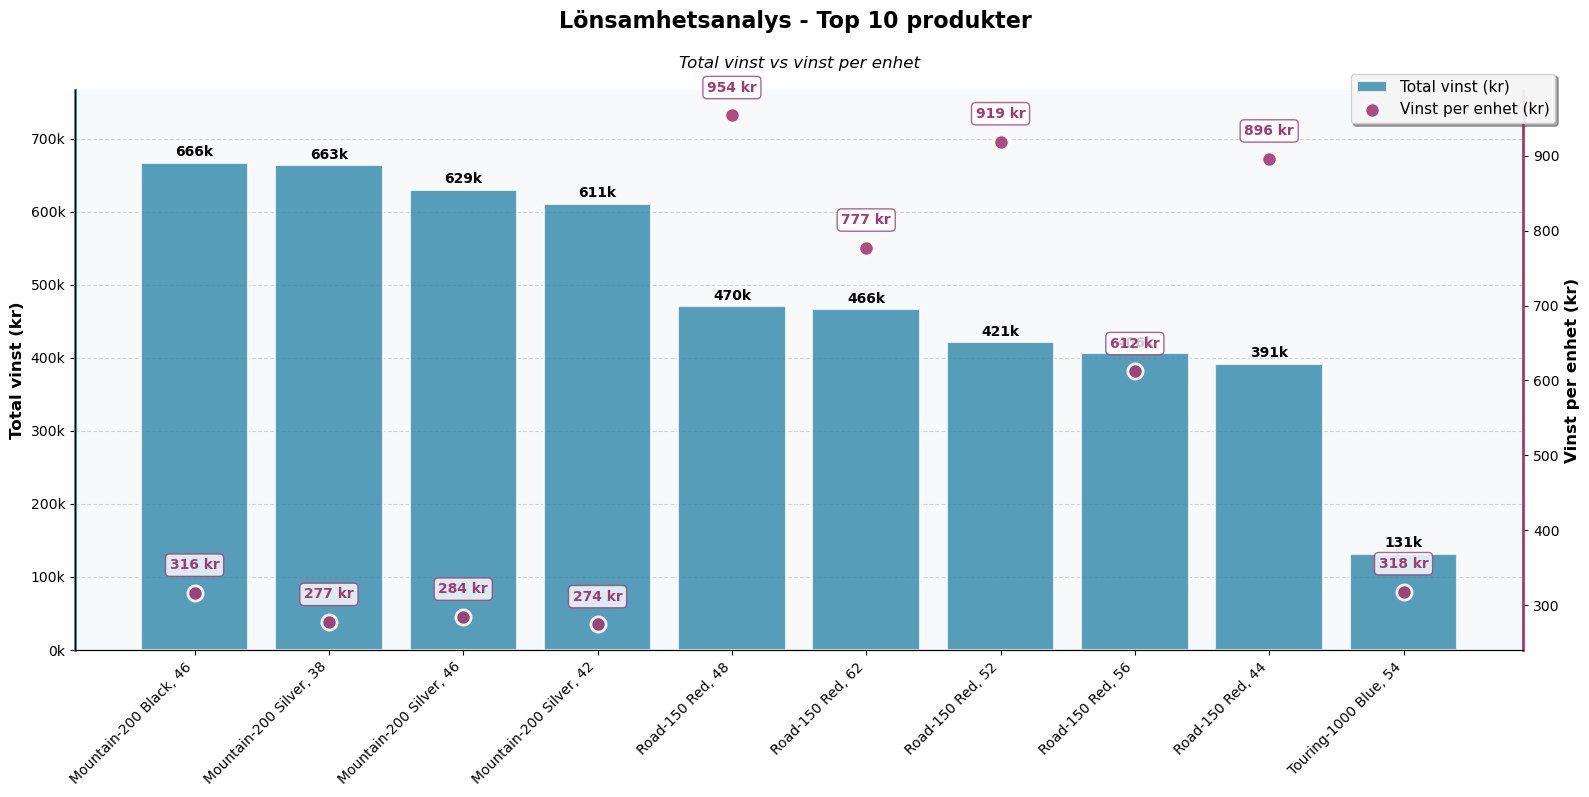

In [69]:
# Visualiserar lönsamhet av topp 10 mest lönsamma produkter

df_combo = df_top10_profit_per_unit.copy()
df_combo["ProfitPerUnitValue"] = df_combo["ProfitPerUnit"].str.replace(" kr", "").str.replace(",", "").astype(float)
df_combo["TotalProfitInt"] = df_combo["TotalProfit"].str.replace(",", "").astype(int)

# Sortera efter total vinst
df_combo = df_combo.sort_values(by="TotalProfitInt", ascending=False)

# Skapa figur 
fig, ax1 = plt.subplots(figsize=(16, 8))

primary_color = "#2E86AB"  # Mer elegant blå
secondary_color = "#A23B72"  # Kontrastrik rosa/röd
background_color = "#F8F9FA"

fig.patch.set_facecolor('white')
ax1.set_facecolor(background_color)

# Staplar för total vinst
x_pos = np.arange(len(df_combo))
bars = ax1.bar(x_pos, df_combo["TotalProfitInt"], 
               color=primary_color, 
               alpha=0.8,
               edgecolor='white', 
               linewidth=1.5,
               label="Total vinst (kr)")

# Lägg till värden på staplarna
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5000,
             f'{int(height/1000)}k',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# Formaterar y-axel
ax1.set_ylabel("Total vinst (kr)", fontsize=12, fontweight='bold')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))
ax1.set_ylim(0, max(df_combo["TotalProfitInt"]) * 1.15)

# Formaterar x-axel
ax1.set_xticks(x_pos)
ax1.set_xticklabels(df_combo["ProductName"], rotation=45, ha='right', fontsize=10)

# Skapar Sekundäraxel för vinst per enhet
ax2 = ax1.twinx()

scatter = ax2.scatter(x_pos, df_combo["ProfitPerUnitValue"], 
                     color=secondary_color, 
                     s=120,  # Större punkter
                     alpha=0.9,
                     edgecolors='white',
                     linewidth=2,
                     zorder=5, 
                     label="Vinst per enhet (kr)")

# Skapar dataetiketter
for i, val in enumerate(df_combo["ProfitPerUnitValue"]):
    ax2.annotate(f"{int(val)} kr", 
                (i, val),
                xytext=(0, 15), 
                textcoords='offset points',
                ha='center', 
                va='bottom',
                color=secondary_color,
                fontsize=10,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', 
                         facecolor='white', 
                         edgecolor=secondary_color,
                         alpha=0.8))

ax2.set_ylabel("Vinst per enhet (kr)", fontsize=12, fontweight='bold')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Titel och subtitel
fig.suptitle("Lönsamhetsanalys - Top 10 produkter", 
             fontsize=16, fontweight='bold', y=0.95)
ax1.text(0.5, 1.04, "Total vinst vs vinst per enhet", 
         transform=ax1.transAxes, ha='center', 
         fontsize=12, style='italic')

# Rutnät
ax1.grid(axis='y', linestyle='--', alpha=0.3, color='gray')
ax1.set_axisbelow(True)

# Legend med positionering
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = fig.legend(lines1 + lines2, labels1 + labels2, 
                   loc="upper right", 
                   bbox_to_anchor=(0.98, 0.88),
                   frameon=True,
                   fancybox=True,
                   shadow=True,
                   fontsize=11)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)

# Förbättra färgkontrast på axlarna
ax1.tick_params(colors='black', which='both')
ax2.tick_params(colors='black', which='both')
ax1.spines['left'].set_color(primary_color)
ax1.spines['left'].set_linewidth(2)
ax2.spines['right'].set_color(secondary_color)
ax2.spines['right'].set_linewidth(2)

# Ta bort onödiga ramar
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Bättre layout
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.show()

In [53]:
# Försäljning per säljare samt lönsamhet per säljare (senaste 12 månaderna)

start_date = '2013-06-30'
end_date = '2014-06-30'

revenue_profit_share_sql = f"""
WITH SalesProfit AS (
    SELECT 
        p.FirstName + ' ' + p.LastName AS SalesPersonName,
        soh.SalesPersonID,
        sod.LineTotal AS SalesAmount,
        pc.Name AS ProductCategory,
        ppp.TotalProfit * CAST(sod.OrderQty AS FLOAT) / NULLIF(ppp.TotalQuantitySold, 0) AS ProfitShare
    FROM Sales.SalesOrderDetail AS sod
    JOIN Sales.SalesOrderHeader AS soh
        ON sod.SalesOrderID = soh.SalesOrderID
    JOIN Analytics.ProfitPerProduct AS ppp
        ON sod.ProductID = ppp.ProductID
    JOIN Production.Product AS pr
        ON sod.ProductID = pr.ProductID
    LEFT JOIN Production.ProductSubcategory AS psc
        ON pr.ProductSubcategoryID = psc.ProductSubcategoryID
    LEFT JOIN Production.ProductCategory AS pc
        ON psc.ProductCategoryID = pc.ProductCategoryID
    JOIN Sales.SalesPerson AS sp
        ON soh.SalesPersonID = sp.BusinessEntityID
    JOIN Person.Person AS p
        ON sp.BusinessEntityID = p.BusinessEntityID
    WHERE soh.SalesPersonID IS NOT NULL
      AND soh.OrderDate BETWEEN '{start_date}' AND '{end_date}'
)

SELECT 
    SalesPersonName,
    SalesPersonID,
    SUM(SalesAmount) AS TotalSalesBySalesPerson,
    SUM(ProfitShare) AS TotalProfitBySalesPerson,

    100.0 * SUM(CASE WHEN ProductCategory = 'Accessories' THEN ProfitShare ELSE 0 END) / NULLIF(SUM(ProfitShare), 0) AS Share_Accessories,
    100.0 * SUM(CASE WHEN ProductCategory = 'Bikes' THEN ProfitShare ELSE 0 END) / NULLIF(SUM(ProfitShare), 0) AS Share_Bikes,
    100.0 * SUM(CASE WHEN ProductCategory = 'Clothing' THEN ProfitShare ELSE 0 END) / NULLIF(SUM(ProfitShare), 0) AS Share_Clothing,
    100.0 * SUM(CASE WHEN ProductCategory = 'Components' THEN ProfitShare ELSE 0 END) / NULLIF(SUM(ProfitShare), 0) AS Share_Components

FROM SalesProfit
GROUP BY SalesPersonID, SalesPersonName
ORDER BY TotalProfitBySalesPerson DESC
"""

df_sales_profit_share = pd.read_sql(revenue_profit_share_sql, engine)

# Formatera kolumner
from IPython.display import display

belopp_kolumner = ["TotalSalesBySalesPerson", "TotalProfitBySalesPerson"]
andel_kolumner = [col for col in df_sales_profit_share.columns if col.startswith("Share_")]

# Formatera belopp med tusenavgränsare
for col in belopp_kolumner:
    df_sales_profit_share[col] = df_sales_profit_share[col].apply(lambda x: f"{int(round(x)):,}")

# Formatera andelar som procent med 1 decimal
for col in andel_kolumner:
    df_sales_profit_share[col] = df_sales_profit_share[col].apply(lambda x: f"{x:.1f} %")

# Visa tabell
display(df_sales_profit_share)


,SalesPersonName,SalesPersonID,TotalSalesBySalesPerson,TotalProfitBySalesPerson,Share_Accessories,Share_Bikes,Share_Clothing,Share_Components
0,Linda Mitchell,276,"3,943,176","422,672",4.7 %,85.3 %,3.8 %,6.2 %
1,Jae Pak,289,"3,632,485","341,691",6.5 %,80.7 %,5.9 %,6.9 %
2,Michael Blythe,275,"3,514,886","320,835",3.3 %,83.7 %,3.8 %,9.2 %
3,Jillian Carson,277,"2,927,313","199,436",11.8 %,78.0 %,5.7 %,4.4 %
4,Ranjit Varkey Chudukatil,290,"3,066,151","198,452",9.3 %,75.7 %,5.0 %,10.0 %
5,José Saraiva,282,"2,452,056","177,176",8.6 %,80.4 %,4.9 %,6.1 %
6,Tsvi Reiter,279,"2,144,310","167,315",5.9 %,83.6 %,6.4 %,4.0 %
7,Pamela Ansman-Wolfe,280,"1,240,241","134,384",2.4 %,83.1 %,3.8 %,10.7 %
8,Shu Ito,281,"2,104,205","126,946",7.9 %,82.4 %,5.7 %,4.0 %
9,David Campbell,283,"1,400,906","113,435",3.7 %,78.0 %,5.6 %,12.7 %


In [57]:
# Snittorder per säljare senaste 12 månaderna

start_date = '2013-06-30'
end_date = '2014-06-30'

query_avg_order_based_on_line_total = f"""
WITH OrderLineData AS (
    SELECT
        soh.SalesOrderID,
        soh.SalesPersonID,
        p.FirstName + ' ' + p.LastName AS SalesPersonName,
        sod.LineTotal
    FROM Sales.SalesOrderHeader AS soh
    JOIN Sales.SalesOrderDetail AS sod
        ON soh.SalesOrderID = sod.SalesOrderID
    JOIN Sales.SalesPerson AS sp
        ON soh.SalesPersonID = sp.BusinessEntityID
    JOIN Person.Person AS p
        ON sp.BusinessEntityID = p.BusinessEntityID
    WHERE soh.SalesPersonID IS NOT NULL
      AND soh.OrderDate BETWEEN '{start_date}' AND '{end_date}'
)

SELECT 
    SalesPersonName,
    SalesPersonID,
    COUNT(DISTINCT SalesOrderID) AS NumberOfOrders,
    SUM(LineTotal) AS TotalSales,
    SUM(LineTotal) * 1.0 / NULLIF(COUNT(DISTINCT SalesOrderID), 0) AS AvgOrderValue
FROM OrderLineData
GROUP BY SalesPersonID, SalesPersonName
ORDER BY AvgOrderValue DESC
"""

df_avg_order = pd.read_sql(query_avg_order_based_on_line_total, engine)

# Formatera kolumner
df_avg_order["NumberOfOrders"] = df_avg_order["NumberOfOrders"].apply(lambda x: f"{x:,}")
df_avg_order["TotalSales"] = df_avg_order["TotalSales"].apply(lambda x: f"{int(round(x)):,} kr")
df_avg_order["AvgOrderValue"] = df_avg_order["AvgOrderValue"].apply(lambda x: f"{round(x):,} kr")

# Visa resultat
df_avg_order


,SalesPersonName,SalesPersonID,NumberOfOrders,TotalSales,AvgOrderValue
0,Pamela Ansman-Wolfe,280,22,"1,240,241 kr","56,375 kr"
1,Stephen Jiang,274,18,"559,698 kr","31,094 kr"
2,Ranjit Varkey Chudukatil,290,110,"3,066,151 kr","27,874 kr"
3,Linda Mitchell,276,160,"3,943,176 kr","24,645 kr"
4,José Saraiva,282,106,"2,452,056 kr","23,133 kr"
5,Shu Ito,281,97,"2,104,205 kr","21,693 kr"
6,Michael Blythe,275,168,"3,514,886 kr","20,922 kr"
7,Jae Pak,289,175,"3,632,485 kr","20,757 kr"
8,Amy Alberts,287,26,"516,194 kr","19,854 kr"
9,David Campbell,283,75,"1,400,906 kr","18,679 kr"


In [10]:
# Konfidensinteravall värde snittorder för LInda Mithcell
import scipy.stats as stats
import numpy as np
import pandas as pd

salesperson_id = 276
start_date = '2013-06-30'
end_date = '2014-06-30'

# Hämta alla ordervärden (exkl moms/frakt) för en säljare
query = f"""
SELECT 
    soh.SalesOrderID,
    sod.LineTotal
FROM Sales.SalesOrderHeader AS soh
JOIN Sales.SalesOrderDetail AS sod
    ON soh.SalesOrderID = sod.SalesOrderID
WHERE soh.SalesPersonID = {salesperson_id}
  AND soh.OrderDate BETWEEN '{start_date}' AND '{end_date}'
"""

df_orders = pd.read_sql(query, engine)

# Summera ordervärdet per order (LineTotal per OrderID)
df_order_sum = df_orders.groupby('SalesOrderID')['LineTotal'].sum().reset_index()

# Beräkna konfidensintervall
order_values = df_order_sum['LineTotal'].values
n = len(order_values)
mean = np.mean(order_values)
std = np.std(order_values, ddof=1)
conf_level = 0.95
t_critical = stats.t.ppf(1 - (1 - conf_level)/2, df=n-1)

margin_of_error = t_critical * (std / np.sqrt(n))
lower = mean - margin_of_error
upper = mean + margin_of_error

# Visa resultat

print(f"95 % KI: ({lower:,.0f} kr, {upper:,.0f} kr)")


95 % KI: (19,910 kr, 29,379 kr)


# Analys och slutsatser

### Analys av försäljning och lönsamhet – Adventure Works

Företaget Adventure Works, som är verksamt inom försäljning av sportartiklar, har haft en stark försäljningsutveckling det senaste året. 
Under de senaste tolv månaderna har försäljningen ökat med 43,4 % jämfört med motsvarande föregående period. 
Det motsvarar en ökning på nästan 15 miljoner kronor, vilket signalerar ett starkt marknadsintresse och väl genomförda försäljningsinsatser.

#### Produktkategorier – Omsättning och marginaler
Cyklar står för hela 86,2% av den totala omsättningen. Trots detta har kategorin den lägsta vinstmarginalen, endast 7 %. 
Accessories (tillbehör) utmärker sig däremot genom en mycket hög marginal på 56 %, vilket gör kategorin strategiskt intressant ur ett 
lönsamhetsperspektiv. Det finns därför goda skäl att framöver fokusera på att optimera produktmixen – att kombinera försäljningsvolym med 
lönsamhet.

#### Produktnivå – Identifiering av nyckelprodukter
På produktnivå är det cykelmodellen Mountain 200 som genererar högst total vinst, vilket beror på dess höga försäljningsvolym. 
Samtidigt är det modellen Road 150 som har högst vinst per såld enhet. Eftersom de två modellerna tillhör olika kategorier – mountainbike respektive racercykel – utgör de snarare komplement än substitut. Ökad försäljning av den ena bör därför inte påverka den andra negativt.
Genom att rikta marknadsföringsinsatser och säljincentiv till Road 150 kan företaget förbättra sin lönsamhet utan att kompromissa med volymförsäljningen av Mountain 200.

#### Säljanalyser – Fokus på prestation och produktmix
En analys av säljarprestationerna visar att de tre säljare som genererar högst försäljningsvolym också har en stor andel av sin försäljning kopplad till cyklar. Detta stärker bilden av cyklar som drivande för omsättningen, men också vikten av att balansera detta med lönsamhet.
Den säljare som utmärker sig mest är Linda Mitchell, som både har högst total försäljning och högst bidrag till vinsten. Hennes genomsnittliga ordervärde är beräknat till cirka 24 600 kr, med ett 95 % konfidensintervall på (19 910 kr, 29 379 kr). Det tyder på en stabil och hög försäljning per kundorder, vilket gör henne till en nyckelperson i försäljningsteamet.

#### Rekommendationer
- Fortsätt driva försäljningen av cyklar, men med ökat fokus på lönsamma modeller såsom Road 150.
- Öka marknadsföring och incitament för säljare att sälja produkter med högre marginaler, särskilt inom tillbehör.
- Analysera och följ upp säljares produktmix regelbundet för att kombinera volym och lönsamhet.
- Dra lärdomar av Linda Mitchells försäljningsstrategi och överväg intern kunskapsdelning för att sprida framgångsrika arbetssätt.


# Executive Summery


Adventure Works has experienced strong sales growth of 43.4% over the past 12 months, driven primarily by high-volume sales of bicycles. While bikes generate the highest revenue, accessories offer significantly higher profit margins, highlighting the importance of optimizing the product mix. 

The Mountain 200 bike is the top-selling model overall, but Road 150 delivers the highest profit per unit, making it a strategic product to promote further. 

Future efforts should focus on aligning sales incentives with profitability rather than volume alone.


# Självutvärdering

1. Utmaningar du haft under arbetet samt hur du hanterat dem.

Jag hade inte tidigare arbetat i Jupyter Notebook, vilket innebar ytterligare ett nytt verktyg att bekanta sig med. Det blev dock ingen större utmaning, eftersom miljön är logisk och jag snabbt fick flyt i att arbeta med kod och resultat i samma vy. Den största utmaningen låg snarare i att kombinera SQL med affärsmässig analys - det är lätt att fokusera på det ena. 


2. Vilket betyg du anser att du skall ha och varför.


Jag anser att jag lever upp till kriterierna för VG. Jag har visat förståelse för hur man undersöker data från olika perspektiv, till exempel genom att analysera tidsperioder, marginaler och andelar av totalvinst per kategori. I min kod använder jag mer avancerade SQL-tekniker, såsom CTE, aggregationer och window functions. Dessutom kopplar jag resultatet till affärsvärde snarare än att bara visa siffror.

3. Tips du hade gett till dig själv i början av kursen nu när du slutfört den.
   
Då jag gått igenom ett helt läsår innan jag genomförde denna kurs, hade jag med mig en bra struktur och vana att planera mitt lärande. Mitt tips till mig själv hade ändå varit: var inte rädd för att dyka ner i kodexempel och testa dig fram praktiskt, det är så förståelsen verkligen fastnar. 